In [12]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import utils
import keras


In [2]:
df = pd.read_csv('A_Z Handwritten Data.csv')


In [3]:
df.shape


(372450, 785)

In [4]:
df.head()


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x = df.drop(df.columns[0],axis=1) # Droping the label column
y = df.iloc[:,0].copy() # Copying the label column


In [6]:
x = np.array(x)
y = utils.to_categorical(y, 26)

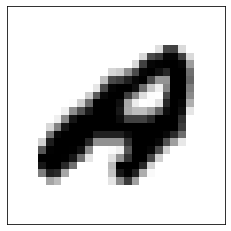

In [7]:
sample_data = x[2112]
sample_image = sample_data.reshape(28, 28)
plt.imshow(sample_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.xticks([])
plt.yticks([])

plt.show()


In [8]:
y[2112]


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Це А

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42)
x_train.shape, x_test.shape


((297960, 784), (74490, 784))

Почищу дані, а то все так багато важить.

In [10]:
%reset_selective -f "^df$"
%reset_selective -f "^x$"
%reset_selective -f "^y$"
%reset_selective -f "^sample_data$"
%reset_selective -f "^sample_image$"


Проблеми з tensor flow board, він чогось створює папку, але потім каже що її не існує... Тому буду всі графіки тут створювати.

In [19]:
model1 = keras.Sequential()


model1.add(keras.layers.Dense(
    26, activation="softmax", input_shape=(784,),
    kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=1)
))

model1.compile(loss="categorical_crossentropy",
               metrics=["accuracy"])
print(model1.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 26)                20410     
                                                                 
Total params: 20,410
Trainable params: 20,410
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
history1 = model1.fit(
    x_train, y_train,
    batch_size=200, epochs=12,
    validation_split=0.2,
    validation_data=(x_test, y_test),
    verbose=1
    )

Epoch 1/12
1490/1490 [==============================] - 11s 7ms/step - loss: 1011.5016 - accuracy: 0.4952 - val_loss: 325.4167 - val_accuracy: 0.7012
Epoch 2/12
1490/1490 [==============================] - 9s 6ms/step - loss: 258.1542 - accuracy: 0.7418 - val_loss: 216.3804 - val_accuracy: 0.7652
Epoch 3/12
1490/1490 [==============================] - 8s 5ms/step - loss: 193.8166 - accuracy: 0.7780 - val_loss: 177.4922 - val_accuracy: 0.7858
Epoch 4/12
1490/1490 [==============================] - 10s 7ms/step - loss: 164.1448 - accuracy: 0.7918 - val_loss: 155.9473 - val_accuracy: 0.7901
Epoch 5/12
1490/1490 [==============================] - 9s 6ms/step - loss: 145.3588 - accuracy: 0.7986 - val_loss: 139.1087 - val_accuracy: 0.8005
Epoch 6/12
1490/1490 [==============================] - 10s 7ms/step - loss: 131.6595 - accuracy: 0.8033 - val_loss: 128.5206 - val_accuracy: 0.8018
Epoch 7/12
1490/1490 [==============================] - 18s 12ms/step - loss: 120.9784 - accuracy: 0.8061 - 

In [21]:
model_relu = keras.Sequential()


model_relu.add(keras.layers.Dense(
    256, activation="relu",input_shape=(784,),
    kernel_initializer=keras.initializers.HeNormal()

))

model_relu.add(keras.layers.Dense(
    128, activation="relu",
    kernel_initializer=keras.initializers.HeNormal()

))

model_relu.add(keras.layers.Dense(
    26, activation="softmax",
    kernel_initializer=keras.initializers.HeNormal()
))

model_relu.compile(loss="categorical_crossentropy", metrics=["accuracy"])
print(model_relu.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 26)                3354      
                                                                 
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
model_tanh = keras.Sequential()


model_tanh.add(keras.layers.Dense(
    256, activation="tanh",input_shape=(784,),
    kernel_initializer=keras.initializers.GlorotNormal()
))

model_tanh.add(keras.layers.Dense(
    128, activation="tanh",
    kernel_initializer=keras.initializers.GlorotNormal()
))

model_tanh.add(keras.layers.Dense(
    26, activation="softmax",
    kernel_initializer=keras.initializers.GlorotNormal()
))

model_tanh.compile(loss="categorical_crossentropy", metrics=["accuracy"])
print(model_relu.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 26)                3354      
                                                                 
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
histoire_relu = model_relu.fit(
    x_train, y_train,
    batch_size=200, epochs=10,
    validation_split=0.2,
    validation_data=(x_test, y_test),
    verbose=1)

Epoch 1/10
1490/1490 [==============================] - 21s 13ms/step - loss: 2.0891 - accuracy: 0.7835 - val_loss: 0.4912 - val_accuracy: 0.8790
Epoch 2/10
1490/1490 [==============================] - 23s 15ms/step - loss: 0.4651 - accuracy: 0.8954 - val_loss: 0.4370 - val_accuracy: 0.9103
Epoch 3/10
1490/1490 [==============================] - 31s 21ms/step - loss: 0.3887 - accuracy: 0.9148 - val_loss: 0.3759 - val_accuracy: 0.9176
Epoch 4/10
1490/1490 [==============================] - 24s 16ms/step - loss: 0.3543 - accuracy: 0.9232 - val_loss: 0.3829 - val_accuracy: 0.9279
Epoch 5/10
1490/1490 [==============================] - 30s 20ms/step - loss: 0.3398 - accuracy: 0.9278 - val_loss: 0.3499 - val_accuracy: 0.9264
Epoch 6/10
1490/1490 [==============================] - 30s 20ms/step - loss: 0.3279 - accuracy: 0.9315 - val_loss: 0.3769 - val_accuracy: 0.9241
Epoch 7/10
1490/1490 [==============================] - 26s 17ms/step - loss: 0.3209 - accuracy: 0.9342 - val_loss: 0.3641 -

In [28]:
histoire_tanh = model_tanh.fit(
    x_train, y_train,
    batch_size=200, epochs=10,
    validation_split=0.2,
    validation_data=(x_test, y_test),
    verbose=1)

Epoch 1/10
1490/1490 [==============================] - 27s 18ms/step - loss: 0.5346 - accuracy: 0.8501 - val_loss: 0.3431 - val_accuracy: 0.9027
Epoch 2/10
1490/1490 [==============================] - 19s 13ms/step - loss: 0.3072 - accuracy: 0.9119 - val_loss: 0.2834 - val_accuracy: 0.9183
Epoch 3/10
1490/1490 [==============================] - 16s 10ms/step - loss: 0.2556 - accuracy: 0.9268 - val_loss: 0.2379 - val_accuracy: 0.9313
Epoch 4/10
1490/1490 [==============================] - 14s 9ms/step - loss: 0.2251 - accuracy: 0.9349 - val_loss: 0.2092 - val_accuracy: 0.9402
Epoch 5/10
1490/1490 [==============================] - 15s 10ms/step - loss: 0.2055 - accuracy: 0.9409 - val_loss: 0.2014 - val_accuracy: 0.9418
Epoch 6/10
1490/1490 [==============================] - 13s 9ms/step - loss: 0.1934 - accuracy: 0.9439 - val_loss: 0.1967 - val_accuracy: 0.9437
Epoch 7/10
1490/1490 [==============================] - 13s 9ms/step - loss: 0.1877 - accuracy: 0.9455 - val_loss: 0.1821 - va

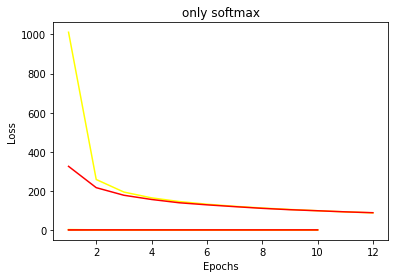

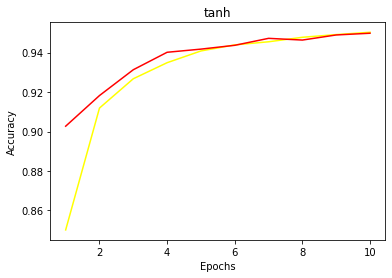

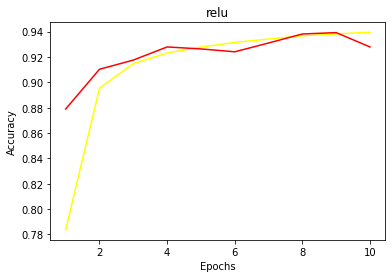

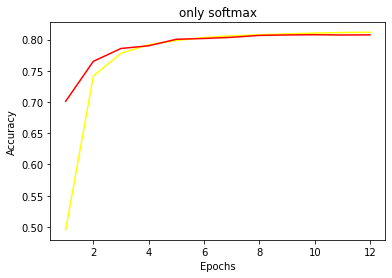

In [39]:
for i in [
    (histoire_tanh, "tanh", 10), (histoire_relu, "relu", 10), (history1, "only softmax", 12)]:
    plt.plot(list(range(1, 1+i[2])), i[0].history['loss'], color='yellow')
    plt.plot(list(range(1, 1+i[2])), i[0].history['val_loss'], color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f"{i[1]}")
for i in [
    (histoire_tanh, "tanh", 10), (histoire_relu, "relu", 10), (history1, "only softmax", 12)]:

    plt.show()
    plt.plot(list(range(1, 1+i[2])), i[0].history['accuracy'], color='yellow')
    plt.plot(list(range(1, 1+i[2])), i[0].history['val_accuracy'], color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f"{i[1]}")

    plt.show()


Підберу швидкість навчання для кожної моделі.

In [41]:
history_tanh_ = []


def temp(learning_rate):

    model_tanh = keras.Sequential()


    model_tanh.add(keras.layers.Dense(
        256, activation="tanh",input_shape=(784,),
        kernel_initializer=keras.initializers.GlorotNormal()
    ))

    model_tanh.add(keras.layers.Dense(
        128, activation="tanh",
        kernel_initializer=keras.initializers.GlorotNormal()
    ))

    model_tanh.add(keras.layers.Dense(
        26, activation="softmax",
        kernel_initializer=keras.initializers.GlorotNormal()
    ))


    optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)


    model_tanh.compile(optimizer=optimizer,
                       loss="categorical_crossentropy", metrics=["accuracy"])
    history_tanh_.append((model_tanh.fit(
        x_train, y_train,
        batch_size=200, epochs=10,
        validation_split=0.2,
        validation_data=(x_test, y_test),
        verbose=0), learning_rate, model_tanh))
    return model_tanh.evaluate(x_test, y_test)


min([0.01, 0.1, 0.001], key=temp)


2328/2328 [==============================] - 11s 5ms/step - loss: 0.1789 - accuracy: 0.9487


0.001

In [42]:
history_relu_ = []


def temp(learning_rate):
    model_relu = keras.Sequential()


    model_relu.add(keras.layers.Dense(
        256, activation="relu",input_shape=(784,),
        kernel_initializer=keras.initializers.HeNormal()

    ))

    model_relu.add(keras.layers.Dense(
        128, activation="relu",
        kernel_initializer=keras.initializers.HeNormal()

    ))

    model_relu.add(keras.layers.Dense(
        26, activation="softmax",
        kernel_initializer=keras.initializers.HeNormal()
    ))


    optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)


    model_relu.compile(optimizer=optimizer,
                       loss="categorical_crossentropy", metrics=["accuracy"])
    history_relu_.append((model_relu.fit(
        x_train, y_train,
        batch_size=200, epochs=20,
        validation_split=0.2,
        validation_data=(x_test, y_test),
        verbose=0), learning_rate, model_relu))
    return model_relu.evaluate(x_test, y_test)


min([0.01, 0.1, 0.001], key=temp)


2328/2328 [==============================] - 6s 3ms/step - loss: 1.4348 - accuracy: 0.7213


0.001

In [43]:
history_1_ = []


def temp(learning_rate):
    model1 = keras.Sequential()

    model1.add(keras.layers.Dense(
        26, activation="softmax", input_shape=(784,),
        kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=1)
    ))

    optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    model1.compile(optimizer=optimizer,
                   loss="categorical_crossentropy", metrics=["accuracy"])
    history_1_.append((model1.fit(
        x_train, y_train,
        batch_size=200, epochs=20,
        validation_split=0.2,
        validation_data=(x_test, y_test),
        verbose=0), learning_rate, model1))
    return model1.evaluate(x_test, y_test)


min([0.01, 0.1, 0.001], key=temp)


2328/2328 [==============================] - 10s 4ms/step - loss: 62.2812 - accuracy: 0.8066


0.001

Отже, всюди дефолтне значення нас влаштовує. І графіки.

tanh


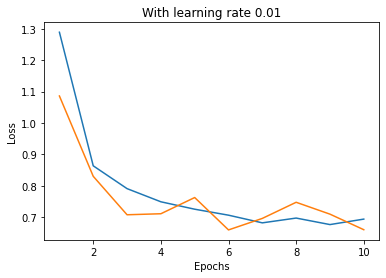

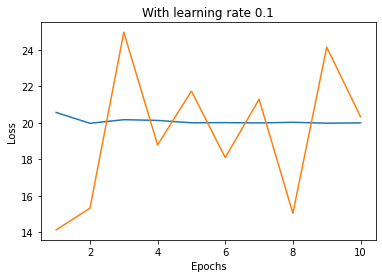

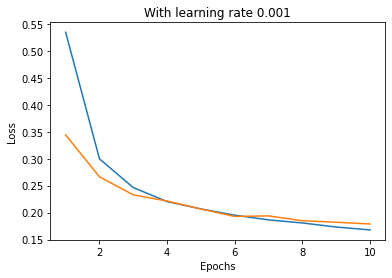

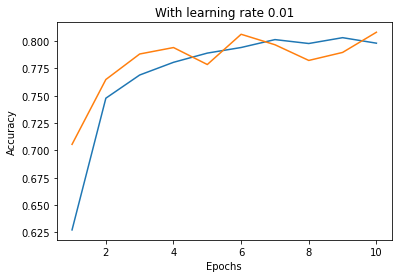

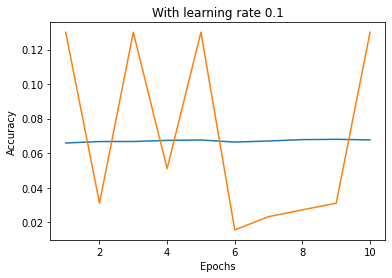

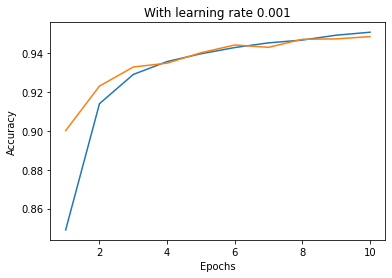

In [44]:
print("tanh")

for i in history_tanh_:
    plt.plot(list(range(1, 11)), i[0].history['loss'])
    plt.plot(list(range(1, 11)), i[0].history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f"With learning rate {i[1]}")

    plt.show()

for i in history_tanh_:
    plt.plot(list(range(1, 11)), i[0].history['accuracy'])
    plt.plot(list(range(1, 11)), i[0].history['val_accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f"With learning rate {i[1]}")

    plt.show()

relu


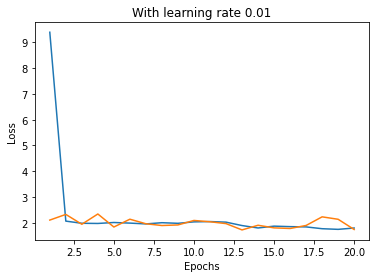

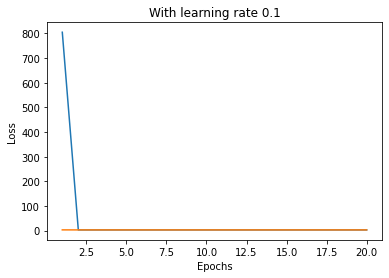

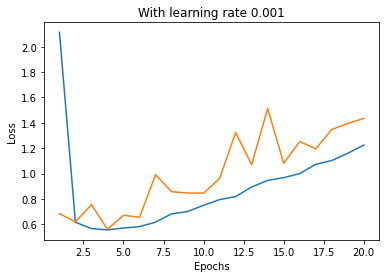

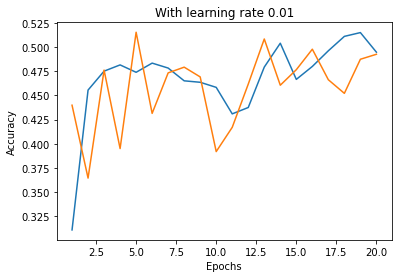

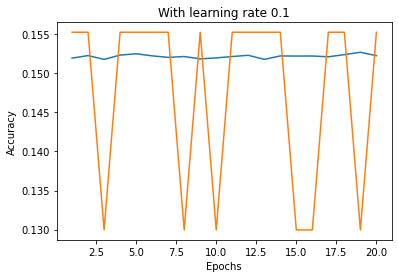

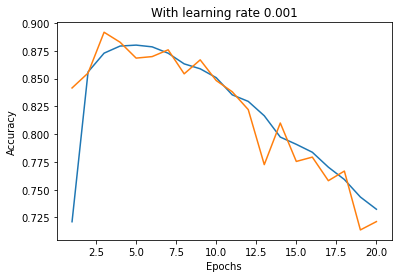

In [48]:
print("relu")

for i in history_relu_:
    plt.plot(list(range(1, 21)), i[0].history['loss'])
    plt.plot(list(range(1, 21)), i[0].history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f"With learning rate {i[1]}")

    plt.show()
for i in history_relu_:
    plt.plot(list(range(1, 21)), i[0].history['accuracy'])
    plt.plot(list(range(1, 21)), i[0].history['val_accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f"With learning rate {i[1]}")

    plt.show()

one layer


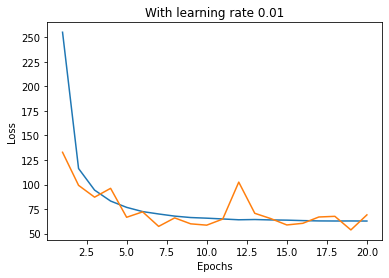

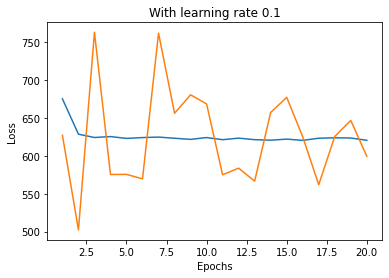

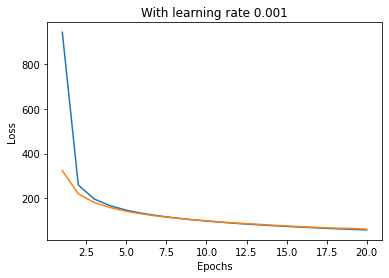

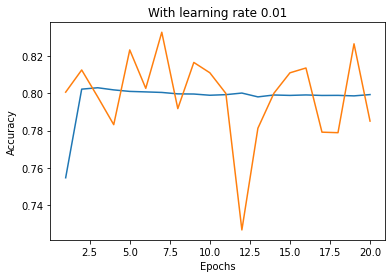

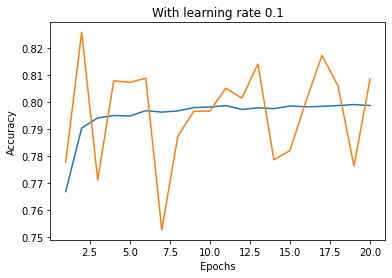

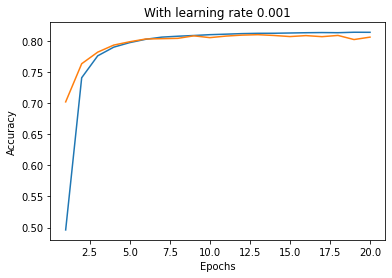

In [49]:

print("one layer")

for i in history_1_:
    plt.plot(list(range(1, 21)), i[0].history['loss'])
    plt.plot(list(range(1, 21)), i[0].history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f"With learning rate {i[1]}")

    plt.show()

for i in history_1_:

    plt.plot(list(range(1, 21)), i[0].history['accuracy'])
    plt.plot(list(range(1, 21)), i[0].history['val_accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f"With learning rate {i[1]}")

    plt.show()

Стосовно методу ініціалізації 

In [50]:
model_relu_he = keras.Sequential()


model_relu_he.add(keras.layers.Dense(
    256, activation="relu", input_shape=(784,),
    kernel_initializer=keras.initializers.HeNormal()

))

model_relu_he.add(keras.layers.Dense(
    128, activation="relu",
    kernel_initializer=keras.initializers.HeNormal()

))

model_relu_he.add(keras.layers.Dense(
    26, activation="softmax",
    kernel_initializer=keras.initializers.HeNormal()
))


model_relu_he.compile(
    loss="categorical_crossentropy", metrics=["accuracy"])


In [55]:
model_relu_std = keras.Sequential()


model_relu_std.add(keras.layers.Dense(
    256, activation="relu", input_shape=(784,),
    # kernel_initializer=keras.initializers.HeNormal()

))

model_relu_std.add(keras.layers.Dense(
    128, activation="relu",
    # kernel_initializer=keras.initializers.HeNormal()

))

model_relu_std.add(keras.layers.Dense(
    26, activation="softmax",
    # kernel_initializer=keras.initializers.HeNormal()
))


model_relu_std.compile(
    loss="categorical_crossentropy", metrics=["accuracy"])


In [51]:
model_relu_glorot = keras.Sequential()


model_relu_glorot.add(keras.layers.Dense(
    256, activation="relu", input_shape=(784,),
    kernel_initializer=keras.initializers.GlorotNormal()


))

model_relu_glorot.add(keras.layers.Dense(
    128, activation="relu",
    kernel_initializer=keras.initializers.GlorotNormal()


))

model_relu_glorot.add(keras.layers.Dense(
    26, activation="softmax",
    kernel_initializer=keras.initializers.GlorotNormal()

))


model_relu_glorot.compile(
    loss="categorical_crossentropy", metrics=["accuracy"])


І збережу тут контрольні точки

In [58]:
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='model_std_weights.h5', monitor='val_accuracy', save_best_only=True, save_weights_only=True)


print("model_relu_std")

history_relu_std__ = model_relu_std.fit(
    x_train, y_train,
    batch_size=200, epochs=10,
    validation_split=0.2,
    validation_data=(x_test, y_test),
    verbose=1, callbacks=[checkpoint_callback])

checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='model_he_weights.h5', monitor='val_accuracy', save_best_only=True, save_weights_only=True)


print("model_relu_he")

history_relu_he__ = model_relu_he.fit(
    x_train, y_train,
    batch_size=200, epochs=10,
    validation_split=0.2,
    validation_data=(x_test, y_test),
    verbose=1, callbacks=[checkpoint_callback])

checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='model_glorot_weights.h5', monitor='val_accuracy', save_best_only=True, save_weights_only=True)

print("model_relu_glorot")

history_relu_glorot__ = model_relu_glorot.fit(
    x_train, y_train,
    batch_size=200, epochs=10,
    validation_split=0.2,
    validation_data=(x_test, y_test),
    verbose=1, callbacks=[checkpoint_callback])


model_relu_std
Epoch 1/10
1490/1490 [==============================] - 20s 13ms/step - loss: 0.2114 - accuracy: 0.9593 - val_loss: 0.2789 - val_accuracy: 0.9521
Epoch 2/10
1490/1490 [==============================] - 22s 14ms/step - loss: 0.2137 - accuracy: 0.9601 - val_loss: 0.3112 - val_accuracy: 0.9456
Epoch 3/10
1490/1490 [==============================] - 19s 13ms/step - loss: 0.2078 - accuracy: 0.9610 - val_loss: 0.2907 - val_accuracy: 0.9581
Epoch 4/10
1490/1490 [==============================] - 15s 10ms/step - loss: 0.2066 - accuracy: 0.9614 - val_loss: 0.2944 - val_accuracy: 0.9589
Epoch 5/10
1490/1490 [==============================] - 15s 10ms/step - loss: 0.2071 - accuracy: 0.9617 - val_loss: 0.2962 - val_accuracy: 0.9571
Epoch 6/10
1490/1490 [==============================] - 13s 9ms/step - loss: 0.2111 - accuracy: 0.9615 - val_loss: 0.2663 - val_accuracy: 0.9553
Epoch 7/10
1490/1490 [==============================] - 12s 8ms/step - loss: 0.2091 - accuracy: 0.9625 - val_l

In [62]:
model_relu_std.evaluate(x_test, y_test)
model_relu_he.evaluate(x_test, y_test)
model_relu_glorot.evaluate(x_test, y_test)


2328/2328 [==============================] - 5s 2ms/step - loss: 0.4704 - accuracy: 0.9415


[0.47037169337272644, 0.9414552450180054]

Отже, `accuracy` в цьому (для relu) std: 0.9671, he: 0.9233, glorot: 0.9415, вийшло, що для std трохи краще.


Графіки, що б подивитися на навчання і може перенавчання.

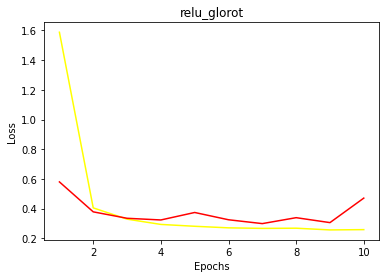

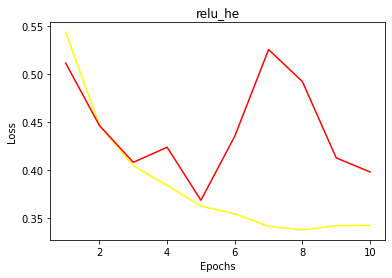

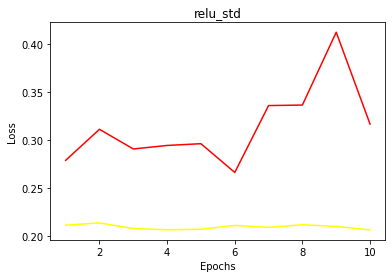

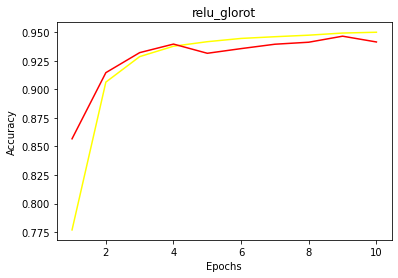

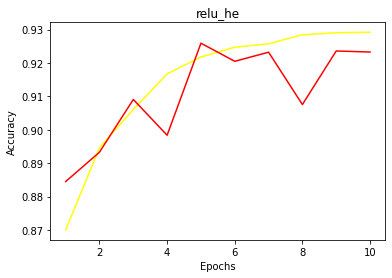

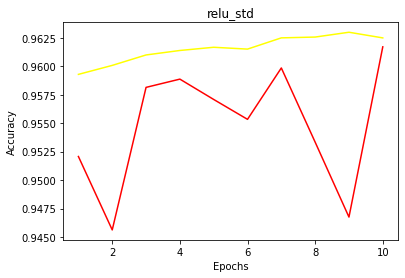

In [63]:
for i in [
    (history_relu_glorot__, "relu_glorot", 10),
    (history_relu_he__, "relu_he", 10),
        (history_relu_std__, "relu_std", 10)]:
    plt.plot(list(range(1, 1+i[2])), i[0].history['loss'], color='yellow')
    plt.plot(list(range(1, 1+i[2])), i[0].history['val_loss'], color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f"{i[1]}")
    plt.show()

for i in [
    (history_relu_glorot__, "relu_glorot", 10),
    (history_relu_he__, "relu_he", 10),
        (history_relu_std__, "relu_std", 10)]:
    plt.plot(list(range(1, 1+i[2])), i[0].history['accuracy'], color='yellow')
    plt.plot(list(range(1, 1+i[2])), i[0].history['val_accuracy'], color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f"{i[1]}")

    plt.show()


Може трохи, якщо дивитися на loss function.

In [60]:
model_relu_std.save("model_std.h5")
model_relu_he.save("model_he.h5")
model_relu_glorot.save("model_glorot.h5")


Оберу для скритих шарів інші функції, типу LeakyReLU, Parametric LeakyReLU, ELU. Та подивлюся як це на неї впливає.

In [92]:
model_LeakyReLU = keras.Sequential()

model_LeakyReLU.add(keras.layers.Dense(
    256, input_shape=(784,),
    kernel_initializer=keras.initializers.GlorotNormal()
))
model_LeakyReLU.add(keras.layers.LeakyReLU())

model_LeakyReLU.add(keras.layers.Dense(
    128,
    kernel_initializer=keras.initializers.GlorotNormal()
))

model_LeakyReLU.add(keras.layers.LeakyReLU())

model_LeakyReLU.add(keras.layers.Dense(
    26, activation="softmax",
    kernel_initializer=keras.initializers.GlorotNormal()
))

model_LeakyReLU.compile(loss="categorical_crossentropy", metrics=["accuracy"])
print(model_LeakyReLU.summary())


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 256)               200960    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_79 (Dense)            (None, 128)               32896     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_80 (Dense)            (None, 26)                3354      
                                                                 
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
_________________________________________________________________
None


In [77]:
model_PReLU = keras.Sequential()

model_PReLU.add(keras.layers.Dense(
    256,input_shape=(784,),
    kernel_initializer=keras.initializers.GlorotNormal()
))
model_PReLU.add(keras.layers.PReLU())


model_PReLU.add(keras.layers.Dense(
    128,
    kernel_initializer=keras.initializers.GlorotNormal()
))

model_PReLU.add(keras.layers.PReLU())

model_PReLU.add(keras.layers.Dense(
    26, activation="softmax",
    kernel_initializer=keras.initializers.GlorotNormal()
))

model_PReLU.compile(loss="categorical_crossentropy", metrics=["accuracy"])
print(model_PReLU.summary())


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 256)               200960    
                                                                 
 p_re_lu_4 (PReLU)           (None, 256)               256       
                                                                 
 dense_70 (Dense)            (None, 128)               32896     
                                                                 
 p_re_lu_5 (PReLU)           (None, 128)               128       
                                                                 
 dense_71 (Dense)            (None, 26)                3354      
                                                                 
Total params: 237,594
Trainable params: 237,594
Non-trainable params: 0
_________________________________________________________________
None


In [78]:
model_ELU = keras.Sequential()


model_ELU.add(keras.layers.Dense(
    256,input_shape=(784,),
    kernel_initializer=keras.initializers.GlorotNormal()
))

model_ELU.add(keras.layers.ELU())

model_ELU.add(keras.layers.Dense(
    128,
    kernel_initializer=keras.initializers.GlorotNormal()
))

model_ELU.add(keras.layers.ELU())

model_ELU.add(keras.layers.Dense(
    26, activation="softmax",
    kernel_initializer=keras.initializers.GlorotNormal()
))

model_ELU.compile(loss="categorical_crossentropy", metrics=["accuracy"])
print(model_ELU.summary())


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 256)               200960    
                                                                 
 elu_4 (ELU)                 (None, 256)               0         
                                                                 
 dense_73 (Dense)            (None, 128)               32896     
                                                                 
 elu_5 (ELU)                 (None, 128)               0         
                                                                 
 dense_74 (Dense)            (None, 26)                3354      
                                                                 
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
_________________________________________________________________
None


In [93]:
histoire_LeakyReLU = model_LeakyReLU.fit(
    x_train, y_train,
    batch_size=200, epochs=8,
    validation_split=0.2,
    validation_data=(x_test, y_test),
    verbose=1)

Epoch 1/8
1490/1490 [==============================] - 22s 14ms/step - loss: 4.2349 - accuracy: 0.8364 - val_loss: 1.5652 - val_accuracy: 0.9029
Epoch 2/8
1490/1490 [==============================] - 16s 10ms/step - loss: 1.3678 - accuracy: 0.9082 - val_loss: 1.0993 - val_accuracy: 0.9267
Epoch 3/8
1490/1490 [==============================] - 15s 10ms/step - loss: 1.0091 - accuracy: 0.9251 - val_loss: 1.0545 - val_accuracy: 0.9268
Epoch 4/8
1490/1490 [==============================] - 14s 10ms/step - loss: 0.8225 - accuracy: 0.9338 - val_loss: 0.9524 - val_accuracy: 0.9268
Epoch 5/8
1490/1490 [==============================] - 16s 11ms/step - loss: 0.6965 - accuracy: 0.9385 - val_loss: 0.9105 - val_accuracy: 0.9230
Epoch 6/8
1490/1490 [==============================] - 14s 9ms/step - loss: 0.5978 - accuracy: 0.9419 - val_loss: 0.6414 - val_accuracy: 0.9398
Epoch 7/8
1490/1490 [==============================] - 15s 10ms/step - loss: 0.5297 - accuracy: 0.9438 - val_loss: 0.5088 - val_acc

In [81]:
histoire_PReLU = model_PReLU.fit(
    x_train, y_train,
    batch_size=200, epochs=8,
    validation_split=0.2,
    validation_data=(x_test, y_test), 
    verbose=1)

Epoch 1/8
1490/1490 [==============================] - 29s 18ms/step - loss: 1.2657 - accuracy: 0.8601 - val_loss: 0.2962 - val_accuracy: 0.9246
Epoch 2/8
1490/1490 [==============================] - 16s 11ms/step - loss: 0.2584 - accuracy: 0.9374 - val_loss: 0.2999 - val_accuracy: 0.9345
Epoch 3/8
1490/1490 [==============================] - 15s 10ms/step - loss: 0.2106 - accuracy: 0.9494 - val_loss: 0.2242 - val_accuracy: 0.9432
Epoch 4/8
1490/1490 [==============================] - 21s 14ms/step - loss: 0.1871 - accuracy: 0.9555 - val_loss: 0.2492 - val_accuracy: 0.9507
Epoch 5/8
1490/1490 [==============================] - 15s 10ms/step - loss: 0.1656 - accuracy: 0.9599 - val_loss: 0.1505 - val_accuracy: 0.9658
Epoch 6/8
1490/1490 [==============================] - 15s 10ms/step - loss: 0.1523 - accuracy: 0.9633 - val_loss: 0.1576 - val_accuracy: 0.9643
Epoch 7/8
1490/1490 [==============================] - 16s 11ms/step - loss: 0.1463 - accuracy: 0.9656 - val_loss: 0.1840 - val_ac

In [82]:
histoire_ELU = model_ELU.fit(
    x_train, y_train,
    batch_size=200, epochs=8,
    validation_split=0.2,
    validation_data=(x_test, y_test),
    verbose=1)

Epoch 1/8
1490/1490 [==============================] - 15s 9ms/step - loss: 1.5781 - accuracy: 0.8317 - val_loss: 0.4437 - val_accuracy: 0.9065
Epoch 2/8
1490/1490 [==============================] - 14s 9ms/step - loss: 0.2775 - accuracy: 0.9340 - val_loss: 0.2675 - val_accuracy: 0.9400
Epoch 3/8
1490/1490 [==============================] - 13s 9ms/step - loss: 0.2107 - accuracy: 0.9509 - val_loss: 0.2182 - val_accuracy: 0.9483
Epoch 4/8
1490/1490 [==============================] - 14s 9ms/step - loss: 0.1816 - accuracy: 0.9576 - val_loss: 0.1993 - val_accuracy: 0.9566
Epoch 5/8
1490/1490 [==============================] - 14s 9ms/step - loss: 0.1611 - accuracy: 0.9628 - val_loss: 0.1663 - val_accuracy: 0.9647
Epoch 6/8
1490/1490 [==============================] - 14s 9ms/step - loss: 0.1492 - accuracy: 0.9662 - val_loss: 0.2383 - val_accuracy: 0.9524
Epoch 7/8
1490/1490 [==============================] - 14s 9ms/step - loss: 0.1405 - accuracy: 0.9687 - val_loss: 0.1816 - val_accuracy:

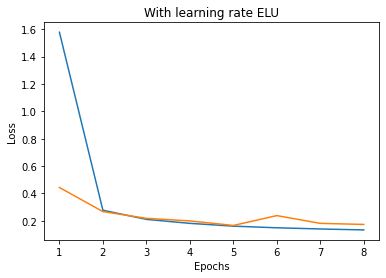

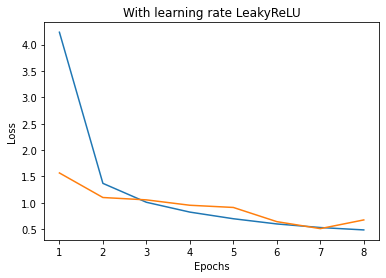

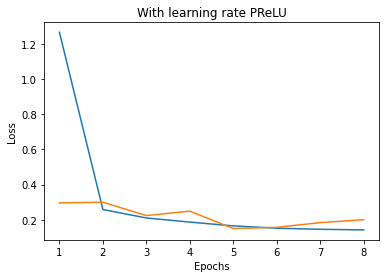

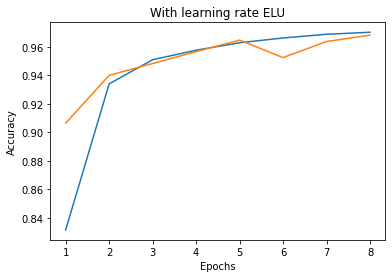

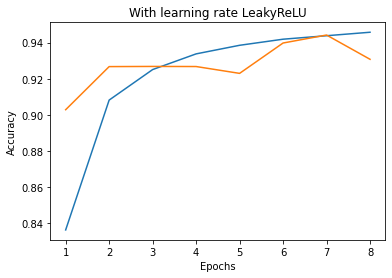

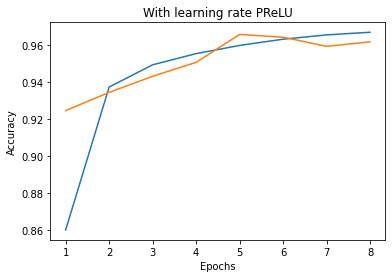

In [94]:
for i in [
    (histoire_ELU, "ELU"),
    (histoire_LeakyReLU, "LeakyReLU"),
        (histoire_PReLU, "PReLU")]:
    plt.plot(list(range(1, 9)), i[0].history['loss'])
    plt.plot(list(range(1, 9)), i[0].history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f"With learning rate {i[1]}")

    plt.show()


for i in [
    (histoire_ELU, "ELU"),
    (histoire_LeakyReLU, "LeakyReLU"),
        (histoire_PReLU, "PReLU")]:

    plt.plot(list(range(1, 9)), i[0].history['accuracy'])
    plt.plot(list(range(1, 9)), i[0].history['val_accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f"With learning rate {i[1]}")

    plt.show()


In [95]:
model_ELU.evaluate(x_test, y_test)
model_PReLU.evaluate(x_test, y_test)
model_LeakyReLU.evaluate(x_test, y_test)
model_tanh.evaluate(x_test, y_test);



2328/2328 [==============================] - 7s 3ms/step - loss: 0.1765 - accuracy: 0.9498


Час навчання tanh: 2m 35.9s, ELU: 1m 50s, PReLu: 2m 21.9s, LeakyReLU: 2 m 12s, отже час навчання дійсно різний. Якість роботи як бачимо порівняна, з різницею не більше за 0.03. Та час відгуку теж приблизно однаковий +-1 s (вважаю, що evaluate підходить, бо порівняння відповідей має бути однаковим)

Отже, надалі буду розглядати Leaky_ReLu модель. І для неї зроблю градієнт спуск методом Adam.

In [96]:
model_LeakyReLU_adam = keras.Sequential()

model_LeakyReLU_adam.add(keras.layers.Dense(
    256, input_shape=(784,),
    kernel_initializer=keras.initializers.GlorotNormal()
))
model_LeakyReLU_adam.add(keras.layers.LeakyReLU())

model_LeakyReLU_adam.add(keras.layers.Dense(
    128,
    kernel_initializer=keras.initializers.GlorotNormal()
))

model_LeakyReLU_adam.add(keras.layers.LeakyReLU())

model_LeakyReLU_adam.add(keras.layers.Dense(
    26, activation="softmax",
    kernel_initializer=keras.initializers.GlorotNormal()
))

optimizer = keras.optimizers.Adam()


model_LeakyReLU_adam.compile(loss="categorical_crossentropy",
                             metrics=["accuracy"], optimizer=optimizer)
print(model_LeakyReLU_adam.summary())


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 256)               200960    
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 256)               0         
                                                                 
 dense_82 (Dense)            (None, 128)               32896     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 128)               0         
                                                                 
 dense_83 (Dense)            (None, 26)                3354      
                                                                 
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
_________________________________________________________________
None


In [97]:
histoire_LeakyReLU_adam = model_LeakyReLU_adam.fit(
    x_train, y_train,
    batch_size=200, epochs=8,
    validation_split=0.2,
    validation_data=(x_test, y_test),
    verbose=1)

Epoch 1/8
1490/1490 [==============================] - 22s 14ms/step - loss: 2.3005 - accuracy: 0.8455 - val_loss: 0.7437 - val_accuracy: 0.9048
Epoch 2/8
1490/1490 [==============================] - 16s 11ms/step - loss: 0.7431 - accuracy: 0.9063 - val_loss: 0.8239 - val_accuracy: 0.8988
Epoch 3/8
1490/1490 [==============================] - 13s 8ms/step - loss: 0.6573 - accuracy: 0.9212 - val_loss: 0.6237 - val_accuracy: 0.9269
Epoch 4/8
1490/1490 [==============================] - 14s 9ms/step - loss: 0.5900 - accuracy: 0.9316 - val_loss: 0.6462 - val_accuracy: 0.9308
Epoch 5/8
1490/1490 [==============================] - 16s 11ms/step - loss: 0.5322 - accuracy: 0.9371 - val_loss: 0.5940 - val_accuracy: 0.9266
Epoch 6/8
1490/1490 [==============================] - 15s 10ms/step - loss: 0.4469 - accuracy: 0.9431 - val_loss: 0.4682 - val_accuracy: 0.9401
Epoch 7/8
1490/1490 [==============================] - 13s 9ms/step - loss: 0.3749 - accuracy: 0.9477 - val_loss: 0.4104 - val_accur

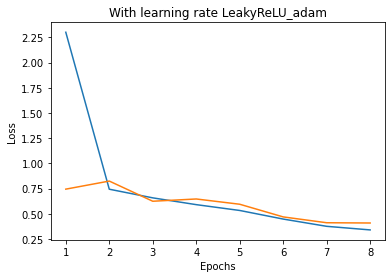

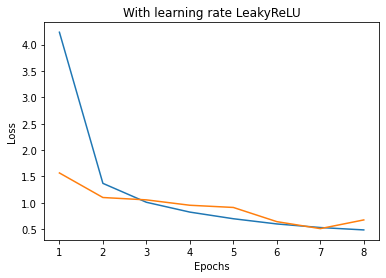

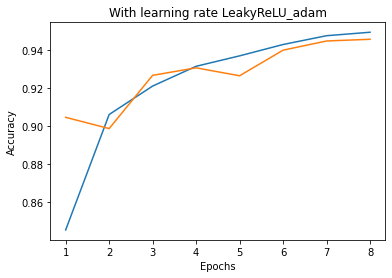

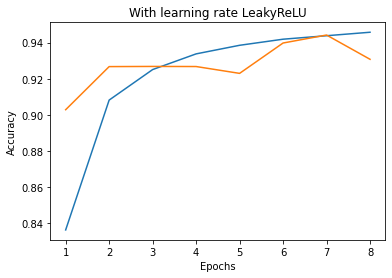

In [98]:
for i in [
    (histoire_LeakyReLU_adam, "LeakyReLU_adam"),
    (histoire_LeakyReLU, "LeakyReLU")]:
    plt.plot(list(range(1, 9)), i[0].history['loss'])
    plt.plot(list(range(1, 9)), i[0].history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f"With learning rate {i[1]}")

    plt.show()
for i in [
    (histoire_LeakyReLU_adam, "LeakyReLU_adam"),
    (histoire_LeakyReLU, "LeakyReLU")]:

    plt.plot(list(range(1, 9)), i[0].history['accuracy'])
    plt.plot(list(range(1, 9)), i[0].history['val_accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f"With learning rate {i[1]}")

    plt.show()


In [100]:
model_LeakyReLU.evaluate(x_test, y_test)
model_LeakyReLU_adam.evaluate(x_test, y_test);


2328/2328 [==============================] - 6s 3ms/step - loss: 0.4078 - accuracy: 0.9458


Отже, дійсно є покращення десь на 0.015.

In [107]:
model_LeakyReLU_adam_normalized = keras.Sequential()


model_LeakyReLU_adam_normalized.add(
    keras.layers.BatchNormalization(input_shape=(784,)),
)
model_LeakyReLU_adam_normalized.add(keras.layers.Dense(
    256,
    kernel_initializer=keras.initializers.GlorotNormal()
))
model_LeakyReLU_adam_normalized.add(keras.layers.LeakyReLU())


model_LeakyReLU_adam_normalized.add(
    keras.layers.BatchNormalization(),
)
model_LeakyReLU_adam_normalized.add(keras.layers.Dense(
    128,
    kernel_initializer=keras.initializers.GlorotNormal()
))

model_LeakyReLU_adam_normalized.add(keras.layers.LeakyReLU())

model_LeakyReLU_adam_normalized.add(
    keras.layers.BatchNormalization(),
)

model_LeakyReLU_adam_normalized.add(keras.layers.Dense(
    26, activation="softmax",
    kernel_initializer=keras.initializers.GlorotNormal()
))

optimizer = keras.optimizers.Adam()


model_LeakyReLU_adam_normalized.compile(loss="categorical_crossentropy",
                             metrics=["accuracy"], optimizer=optimizer)

print(model_LeakyReLU_adam_normalized.summary())


Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_12 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_96 (Dense)            (None, 256)               200960    
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 256)               0         
                                                                 
 batch_normalization_13 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_97 (Dense)            (None, 128)               32896     
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 128)             

In [113]:
model_LeakyReLU_adam_normalized_init = keras.Sequential()


model_LeakyReLU_adam_normalized_init.add(
    keras.layers.BatchNormalization(input_shape=(784,)),
)
model_LeakyReLU_adam_normalized_init.add(keras.layers.Dense(
    256,
    kernel_initializer=keras.initializers.HeNormal()
))
model_LeakyReLU_adam_normalized_init.add(keras.layers.LeakyReLU())


model_LeakyReLU_adam_normalized_init.add(
    keras.layers.BatchNormalization(),
)
model_LeakyReLU_adam_normalized_init.add(keras.layers.Dense(
    128,
    kernel_initializer=keras.initializers.GlorotNormal()
))

model_LeakyReLU_adam_normalized_init.add(keras.layers.LeakyReLU())

model_LeakyReLU_adam_normalized_init.add(
    keras.layers.BatchNormalization(),
)

model_LeakyReLU_adam_normalized_init.add(keras.layers.Dense(
    26, activation="softmax",
    kernel_initializer=keras.initializers.GlorotNormal()
))

optimizer = keras.optimizers.Adam()


model_LeakyReLU_adam_normalized_init.compile(loss="categorical_crossentropy",
                             metrics=["accuracy"], optimizer=optimizer)

print(model_LeakyReLU_adam_normalized_init.summary())


Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_18 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_102 (Dense)           (None, 256)               200960    
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 256)               0         
                                                                 
 batch_normalization_19 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_103 (Dense)           (None, 128)               32896     
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 128)             

In [108]:
model_LeakyReLU_adam_normalized_dif = keras.Sequential()


model_LeakyReLU_adam_normalized_dif.add(
    keras.layers.BatchNormalization(input_shape=(784,)),
)
model_LeakyReLU_adam_normalized_dif.add(keras.layers.Dense(
    256,
    kernel_initializer=keras.initializers.GlorotNormal()
))
model_LeakyReLU_adam_normalized_dif.add(keras.layers.LeakyReLU())


model_LeakyReLU_adam_normalized_dif.add(
    keras.layers.BatchNormalization(),
)
model_LeakyReLU_adam_normalized_dif.add(keras.layers.Dense(
    128,
    kernel_initializer=keras.initializers.GlorotNormal()
))

model_LeakyReLU_adam_normalized_dif.add(keras.layers.LeakyReLU())

model_LeakyReLU_adam_normalized_dif.add(
    keras.layers.BatchNormalization(),
)

model_LeakyReLU_adam_normalized_dif.add(keras.layers.Dense(
    26, activation="softmax",
    kernel_initializer=keras.initializers.GlorotNormal()
))

optimizer = keras.optimizers.Adam(learning_rate=0.1)


model_LeakyReLU_adam_normalized_dif.compile(loss="categorical_crossentropy",
                             metrics=["accuracy"], optimizer=optimizer)
print(model_LeakyReLU_adam_normalized_dif.summary())


Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_15 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_99 (Dense)            (None, 256)               200960    
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 256)               0         
                                                                 
 batch_normalization_16 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_100 (Dense)           (None, 128)               32896     
                                                                 
 leaky_re_lu_23 (LeakyReLU)  (None, 128)             

In [109]:
histoire_LeakyReLU_adam_normalized = model_LeakyReLU_adam_normalized.fit(
    x_train, y_train,
    batch_size=200, epochs=8,
    validation_split=0.2,
    validation_data=(x_test, y_test),
    verbose=1)

Epoch 1/8
1490/1490 [==============================] - 31s 20ms/step - loss: 0.2802 - accuracy: 0.9236 - val_loss: 0.2371 - val_accuracy: 0.9607
Epoch 2/8
1490/1490 [==============================] - 21s 14ms/step - loss: 0.1246 - accuracy: 0.9646 - val_loss: 0.3260 - val_accuracy: 0.9678
Epoch 3/8
1490/1490 [==============================] - 21s 14ms/step - loss: 0.0954 - accuracy: 0.9724 - val_loss: 0.3806 - val_accuracy: 0.9723
Epoch 4/8
1490/1490 [==============================] - 28s 19ms/step - loss: 0.0806 - accuracy: 0.9764 - val_loss: 0.2354 - val_accuracy: 0.9746
Epoch 5/8
1490/1490 [==============================] - 26s 17ms/step - loss: 0.0697 - accuracy: 0.9791 - val_loss: 0.2456 - val_accuracy: 0.9778
Epoch 6/8
1490/1490 [==============================] - 21s 14ms/step - loss: 0.0615 - accuracy: 0.9814 - val_loss: 0.3046 - val_accuracy: 0.9796
Epoch 7/8
1490/1490 [==============================] - 22s 15ms/step - loss: 0.0548 - accuracy: 0.9832 - val_loss: 0.3791 - val_ac

In [110]:
histoire_LeakyReLU_adam_normalized_dif = model_LeakyReLU_adam_normalized_dif.fit(
    x_train, y_train,
    batch_size=200, epochs=8,
    validation_split=0.2,
    validation_data=(x_test, y_test),
    verbose=1)

Epoch 1/8
1490/1490 [==============================] - 29s 19ms/step - loss: 0.4265 - accuracy: 0.8835 - val_loss: 0.4874 - val_accuracy: 0.9166
Epoch 2/8
1490/1490 [==============================] - 20s 14ms/step - loss: 0.2782 - accuracy: 0.9281 - val_loss: 0.5925 - val_accuracy: 0.9204
Epoch 3/8
1490/1490 [==============================] - 30s 20ms/step - loss: 0.2620 - accuracy: 0.9352 - val_loss: 0.4547 - val_accuracy: 0.9304
Epoch 4/8
1490/1490 [==============================] - 19s 13ms/step - loss: 0.2400 - accuracy: 0.9421 - val_loss: 0.3018 - val_accuracy: 0.9448
Epoch 5/8
1490/1490 [==============================] - 19s 13ms/step - loss: 0.2322 - accuracy: 0.9462 - val_loss: 0.3407 - val_accuracy: 0.9430
Epoch 6/8
1490/1490 [==============================] - 19s 13ms/step - loss: 0.2140 - accuracy: 0.9496 - val_loss: 0.2705 - val_accuracy: 0.9597
Epoch 7/8
1490/1490 [==============================] - 19s 13ms/step - loss: 0.2244 - accuracy: 0.9519 - val_loss: 0.2768 - val_ac

In [114]:
histoire_LeakyReLU_adam_normalized_init=model_LeakyReLU_adam_normalized_init.fit(
    x_train, y_train,
    batch_size=200, epochs=8,
    validation_split=0.2,
    validation_data=(x_test, y_test),
    verbose=1)

Epoch 1/8
1490/1490 [==============================] - 40s 23ms/step - loss: 0.2806 - accuracy: 0.9233 - val_loss: 0.2064 - val_accuracy: 0.9586
Epoch 2/8
1490/1490 [==============================] - 27s 18ms/step - loss: 0.1243 - accuracy: 0.9646 - val_loss: 0.3070 - val_accuracy: 0.9678
Epoch 3/8
1490/1490 [==============================] - 24s 16ms/step - loss: 0.0957 - accuracy: 0.9722 - val_loss: 0.2162 - val_accuracy: 0.9743
Epoch 4/8
1490/1490 [==============================] - 28s 19ms/step - loss: 0.0793 - accuracy: 0.9766 - val_loss: 0.2787 - val_accuracy: 0.9758
Epoch 5/8
1490/1490 [==============================] - 20s 14ms/step - loss: 0.0703 - accuracy: 0.9792 - val_loss: 0.1486 - val_accuracy: 0.9776
Epoch 6/8
1490/1490 [==============================] - 22s 15ms/step - loss: 0.0621 - accuracy: 0.9814 - val_loss: 0.1577 - val_accuracy: 0.9780
Epoch 7/8
1490/1490 [==============================] - 22s 15ms/step - loss: 0.0558 - accuracy: 0.9831 - val_loss: 0.1578 - val_ac

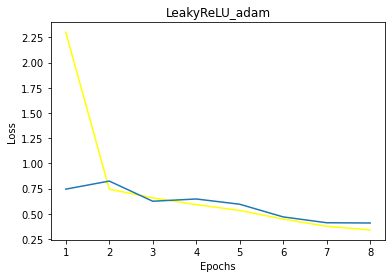

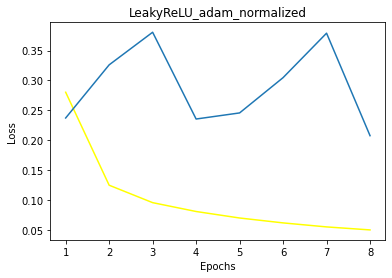

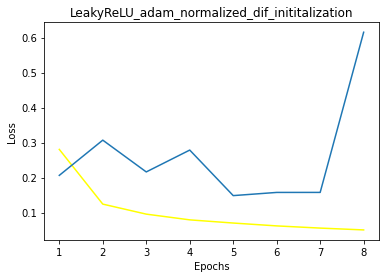

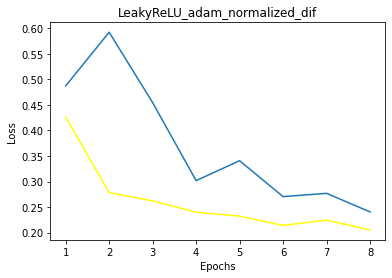

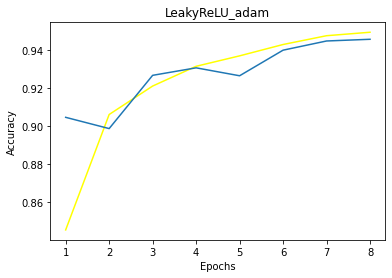

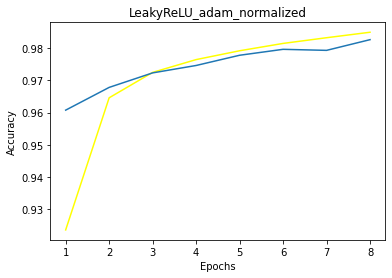

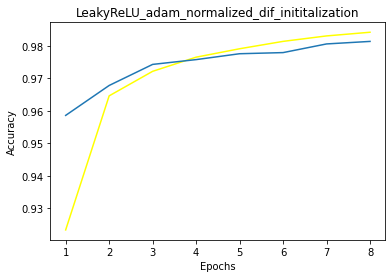

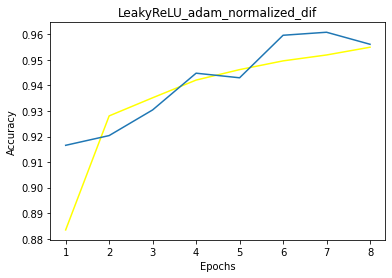

In [115]:
for i in [
    (histoire_LeakyReLU_adam, "LeakyReLU_adam"),
    (histoire_LeakyReLU_adam_normalized, "LeakyReLU_adam_normalized"),
    (histoire_LeakyReLU_adam_normalized_init,
     'LeakyReLU_adam_normalized_dif_inititalization'),
    (histoire_LeakyReLU_adam_normalized_dif, 'LeakyReLU_adam_normalized_dif')
]:
    plt.plot(list(range(1, 9)), i[0].history['loss'], color='yellow')
    plt.plot(list(range(1, 9)), i[0].history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f"{i[1]}")

    plt.show()
for i in [
    (histoire_LeakyReLU_adam, "LeakyReLU_adam"),
    (histoire_LeakyReLU_adam_normalized, "LeakyReLU_adam_normalized"),
    (histoire_LeakyReLU_adam_normalized_init,
     'LeakyReLU_adam_normalized_dif_inititalization'),
    (histoire_LeakyReLU_adam_normalized_dif, 'LeakyReLU_adam_normalized_dif')
]:
    plt.plot(list(range(1, 9)), i[0].history['accuracy'], color='yellow')
    plt.plot(list(range(1, 9)), i[0].history['val_accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f"{i[1]}")

    plt.show()


In [117]:
model_LeakyReLU_adam_normalized_init.predict(x_test)
model_LeakyReLU_adam_normalized_dif.predict(x_test)
model_LeakyReLU_adam_normalized.predict(x_test)
model_LeakyReLU_adam.predict(x_test);


2328/2328 [==============================] - 6s 2ms/step


Якщо дивитися на графік accuracy, то таке стало менш чутливе до початкової ініціалізації. Час не прискорився, він вийшов за 3хв, хоча в мене під час тринування були запущені інші додатки. При більшій швидкості навчання точність трози впала. Час прогнозу не змінився. 

Додам дропаут

In [118]:
model_LeakyReLU_adam_normalized_dropout = keras.Sequential()


model_LeakyReLU_adam_normalized_dropout.add(
    keras.layers.BatchNormalization(input_shape=(784,)),
)
model_LeakyReLU_adam_normalized_dropout.add(keras.layers.Dense(
    256,
    kernel_initializer=keras.initializers.HeNormal()
))
model_LeakyReLU_adam_normalized_dropout.add(keras.layers.LeakyReLU())


model_LeakyReLU_adam_normalized_dropout.add(
    keras.layers.BatchNormalization(),
)
model_LeakyReLU_adam_normalized_dropout.add(keras.layers.Dropout(0.25))

model_LeakyReLU_adam_normalized_dropout.add(keras.layers.Dense(
    128,
    kernel_initializer=keras.initializers.GlorotNormal()
))

model_LeakyReLU_adam_normalized_dropout.add(keras.layers.LeakyReLU())

model_LeakyReLU_adam_normalized_dropout.add(
    keras.layers.BatchNormalization(),
)

model_LeakyReLU_adam_normalized_dropout.add(keras.layers.Dense(
    26, activation="softmax",
    kernel_initializer=keras.initializers.GlorotNormal()
))

optimizer = keras.optimizers.Adam()


model_LeakyReLU_adam_normalized_dropout.compile(loss="categorical_crossentropy",
                             metrics=["accuracy"], optimizer=optimizer)

print(model_LeakyReLU_adam_normalized_dropout.summary())


Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_21 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_105 (Dense)           (None, 256)               200960    
                                                                 
 leaky_re_lu_26 (LeakyReLU)  (None, 256)               0         
                                                                 
 batch_normalization_22 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_106 (Dense)           (None, 128)             

In [119]:
histoire_LeakyReLU_adam_normalized_dropout=model_LeakyReLU_adam_normalized_dropout.fit(
    x_train, y_train,
    batch_size=200, epochs=8,
    validation_split=0.2,
    validation_data=(x_test, y_test),
    verbose=1)

Epoch 1/8
1490/1490 [==============================] - 39s 25ms/step - loss: 0.3718 - accuracy: 0.8981 - val_loss: 0.3923 - val_accuracy: 0.9536
Epoch 2/8
1490/1490 [==============================] - 25s 17ms/step - loss: 0.1972 - accuracy: 0.9440 - val_loss: 0.1894 - val_accuracy: 0.9644
Epoch 3/8
1490/1490 [==============================] - 28s 19ms/step - loss: 0.1602 - accuracy: 0.9545 - val_loss: 0.1803 - val_accuracy: 0.9696
Epoch 4/8
1490/1490 [==============================] - 24s 16ms/step - loss: 0.1417 - accuracy: 0.9594 - val_loss: 0.1762 - val_accuracy: 0.9723
Epoch 5/8
1490/1490 [==============================] - 26s 17ms/step - loss: 0.1273 - accuracy: 0.9631 - val_loss: 0.2381 - val_accuracy: 0.9727
Epoch 6/8
1490/1490 [==============================] - 23s 15ms/step - loss: 0.1176 - accuracy: 0.9659 - val_loss: 0.1287 - val_accuracy: 0.9758
Epoch 7/8
1490/1490 [==============================] - 21s 14ms/step - loss: 0.1108 - accuracy: 0.9679 - val_loss: 0.1620 - val_ac

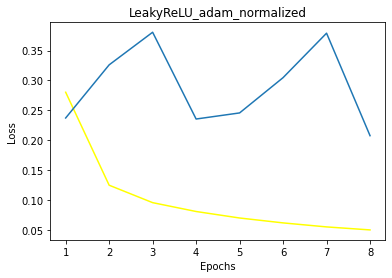

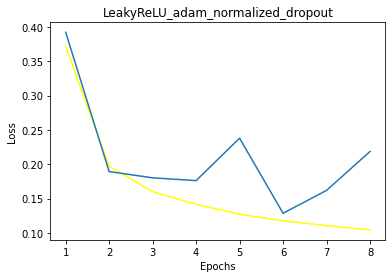

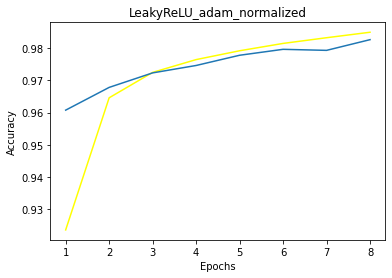

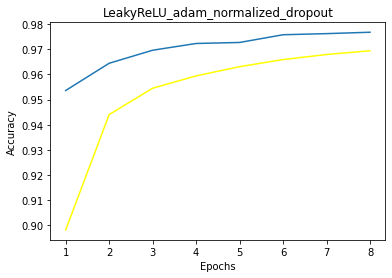

In [120]:
for i in [
    (histoire_LeakyReLU_adam_normalized, "LeakyReLU_adam_normalized"),
    (histoire_LeakyReLU_adam_normalized_dropout,
     'LeakyReLU_adam_normalized_dropout')
]:
    plt.plot(list(range(1, 9)), i[0].history['loss'], color='yellow')
    plt.plot(list(range(1, 9)), i[0].history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f"{i[1]}")

    plt.show()
for i in [
    (histoire_LeakyReLU_adam_normalized, "LeakyReLU_adam_normalized"),
    (histoire_LeakyReLU_adam_normalized_dropout,
     'LeakyReLU_adam_normalized_dropout')
]:
    plt.plot(list(range(1, 9)), i[0].history['accuracy'], color='yellow')
    plt.plot(list(range(1, 9)), i[0].history['val_accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f"{i[1]}")

    plt.show()


Якщо мережа перенавчається, то треба збільшувати значення р.

Рання зупинку, за умови, що немає покарщень декілька разів поспіль.

In [121]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True)

histoire_LeakyReLU_adam_normalized_dropout_early_stop = model_LeakyReLU_adam_normalized_dropout.fit(
    x_train, y_train,
    batch_size=200, epochs=8,
    validation_split=0.2,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[early_stopping])

Epoch 1/8
1490/1490 [==============================] - 26s 17ms/step - loss: 0.0997 - accuracy: 0.9705 - val_loss: 0.1604 - val_accuracy: 0.9785
Epoch 2/8
1490/1490 [==============================] - 24s 16ms/step - loss: 0.0950 - accuracy: 0.9718 - val_loss: 0.2290 - val_accuracy: 0.9790
Epoch 3/8
1490/1490 [==============================] - 22s 15ms/step - loss: 0.0915 - accuracy: 0.9729 - val_loss: 0.1950 - val_accuracy: 0.9798
Epoch 4/8
1490/1490 [==============================] - 30s 20ms/step - loss: 0.0879 - accuracy: 0.9740 - val_loss: 0.1722 - val_accuracy: 0.9809


Отже, відбулася рання зупинка.

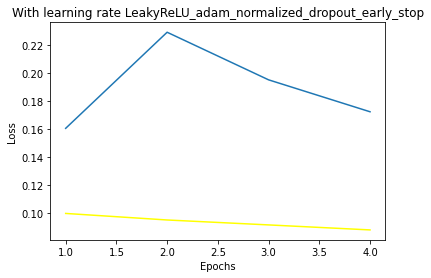

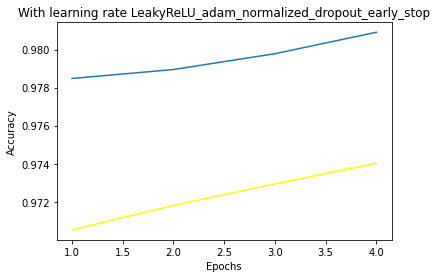

In [123]:

for i in [
    (histoire_LeakyReLU_adam_normalized_dropout_early_stop,
        "LeakyReLU_adam_normalized_dropout_early_stop")]:
    plt.plot(list(range(1, 5)), i[0].history['loss'], color='yellow')
    plt.plot(list(range(1, 5)), i[0].history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f"With learning rate {i[1]}")

    plt.show()

    plt.plot(list(range(1, 5)), i[0].history['accuracy'], color='yellow')
    plt.plot(list(range(1, 5)), i[0].history['val_accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f"With learning rate {i[1]}")

    plt.show()


Додам $l_1$, $l_2$ та max-norm регуляризації.

In [127]:
model_LeakyReLU_adam_normalized_l1 = keras.Sequential()


model_LeakyReLU_adam_normalized_l1.add(
    keras.layers.BatchNormalization(input_shape=(784,)),
)
model_LeakyReLU_adam_normalized_l1.add(keras.layers.Dense(
    256, kernel_regularizer='l1',
    kernel_initializer=keras.initializers.GlorotNormal()
))
model_LeakyReLU_adam_normalized_l1.add(keras.layers.LeakyReLU())


model_LeakyReLU_adam_normalized_l1.add(
    keras.layers.BatchNormalization(),
)
model_LeakyReLU_adam_normalized_l1.add(keras.layers.Dense(
    128, kernel_regularizer='l1',
    kernel_initializer=keras.initializers.GlorotNormal()
))

model_LeakyReLU_adam_normalized_l1.add(keras.layers.LeakyReLU())

model_LeakyReLU_adam_normalized_l1.add(
    keras.layers.BatchNormalization(),
)

model_LeakyReLU_adam_normalized_l1.add(keras.layers.Dense(
    26, activation="softmax", kernel_regularizer='l1',
    kernel_initializer=keras.initializers.GlorotNormal()
))

optimizer = keras.optimizers.Adam()


model_LeakyReLU_adam_normalized_l1.compile(loss="categorical_crossentropy",
                                           metrics=["accuracy"], optimizer=optimizer)

print(model_LeakyReLU_adam_normalized_l1.summary())


Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_27 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_111 (Dense)           (None, 256)               200960    
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 256)               0         
                                                                 
 batch_normalization_28 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_112 (Dense)           (None, 128)               32896     
                                                                 
 leaky_re_lu_31 (LeakyReLU)  (None, 128)             

In [128]:
model_LeakyReLU_adam_normalized_l2 = keras.Sequential()


model_LeakyReLU_adam_normalized_l2.add(
    keras.layers.BatchNormalization(input_shape=(784,)),
)
model_LeakyReLU_adam_normalized_l2.add(keras.layers.Dense(
    256, kernel_regularizer='l2',
    kernel_initializer=keras.initializers.GlorotNormal()
))
model_LeakyReLU_adam_normalized_l2.add(keras.layers.LeakyReLU())


model_LeakyReLU_adam_normalized_l2.add(
    keras.layers.BatchNormalization(),
)
model_LeakyReLU_adam_normalized_l2.add(keras.layers.Dense(
    128, kernel_regularizer='l2',
    kernel_initializer=keras.initializers.GlorotNormal()
))

model_LeakyReLU_adam_normalized_l2.add(keras.layers.LeakyReLU())

model_LeakyReLU_adam_normalized_l2.add(
    keras.layers.BatchNormalization(),
)

model_LeakyReLU_adam_normalized_l2.add(keras.layers.Dense(
    26, activation="softmax", kernel_regularizer='l2',
    kernel_initializer=keras.initializers.GlorotNormal()
))

optimizer = keras.optimizers.Adam()


model_LeakyReLU_adam_normalized_l2.compile(loss="categorical_crossentropy",
                                           metrics=["accuracy"], optimizer=optimizer)

print(model_LeakyReLU_adam_normalized_l2.summary())


Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_30 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_114 (Dense)           (None, 256)               200960    
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 256)               0         
                                                                 
 batch_normalization_31 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_115 (Dense)           (None, 128)               32896     
                                                                 
 leaky_re_lu_33 (LeakyReLU)  (None, 128)             

In [142]:
from keras.constraints import max_norm
model_LeakyReLU_adam_normalized_max_norm = keras.Sequential()

model_LeakyReLU_adam_normalized_max_norm.add(
    keras.layers.BatchNormalization(input_shape=(784,)),
)
model_LeakyReLU_adam_normalized_max_norm.add(keras.layers.Dense(
    256,
    kernel_constraint=max_norm(),
    kernel_initializer=keras.initializers.GlorotNormal()
))
model_LeakyReLU_adam_normalized_max_norm.add(keras.layers.LeakyReLU())


model_LeakyReLU_adam_normalized_max_norm.add(
    keras.layers.BatchNormalization(),
)
model_LeakyReLU_adam_normalized_max_norm.add(keras.layers.Dense(
    128,
    kernel_constraint=max_norm(),
    kernel_initializer=keras.initializers.GlorotNormal()
))

model_LeakyReLU_adam_normalized_max_norm.add(keras.layers.LeakyReLU())

model_LeakyReLU_adam_normalized_max_norm.add(
    keras.layers.BatchNormalization(),
)

model_LeakyReLU_adam_normalized_max_norm.add(keras.layers.Dense(
    26, activation="softmax",
      kernel_constraint=max_norm(),
    kernel_initializer=keras.initializers.GlorotNormal()
))

optimizer = keras.optimizers.Adam()


model_LeakyReLU_adam_normalized_max_norm.compile(loss="categorical_crossentropy",
                                                 metrics=["accuracy"], optimizer=optimizer)

print(model_LeakyReLU_adam_normalized_max_norm.summary())


Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_48 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_132 (Dense)           (None, 256)               200960    
                                                                 
 leaky_re_lu_44 (LeakyReLU)  (None, 256)               0         
                                                                 
 batch_normalization_49 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_133 (Dense)           (None, 128)               32896     
                                                                 
 leaky_re_lu_45 (LeakyReLU)  (None, 128)             

In [143]:
histoire_LeakyReLU_adam_normalized_max_norm=model_LeakyReLU_adam_normalized_max_norm.fit(
    x_train, y_train,
    batch_size=200, epochs=8,
    validation_split=0.2,
    validation_data=(x_test, y_test),
    verbose=1)

Epoch 1/8
1490/1490 [==============================] - 28s 18ms/step - loss: 0.2798 - accuracy: 0.9242 - val_loss: 0.2669 - val_accuracy: 0.9598
Epoch 2/8
1490/1490 [==============================] - 24s 16ms/step - loss: 0.1239 - accuracy: 0.9651 - val_loss: 0.2260 - val_accuracy: 0.9712
Epoch 3/8
1490/1490 [==============================] - 24s 16ms/step - loss: 0.0970 - accuracy: 0.9722 - val_loss: 0.2838 - val_accuracy: 0.9731
Epoch 4/8
1490/1490 [==============================] - 24s 16ms/step - loss: 0.0826 - accuracy: 0.9758 - val_loss: 0.3487 - val_accuracy: 0.9716
Epoch 5/8
1490/1490 [==============================] - 23s 16ms/step - loss: 0.0746 - accuracy: 0.9780 - val_loss: 0.5120 - val_accuracy: 0.9762
Epoch 6/8
1490/1490 [==============================] - 21s 14ms/step - loss: 0.0668 - accuracy: 0.9801 - val_loss: 0.2512 - val_accuracy: 0.9791
Epoch 7/8
1490/1490 [==============================] - 22s 15ms/step - loss: 0.0638 - accuracy: 0.9807 - val_loss: 0.2026 - val_ac

In [131]:
histoire_LeakyReLU_adam_normalized_l2=model_LeakyReLU_adam_normalized_l2.fit(
    x_train, y_train,
    batch_size=200, epochs=8,
    validation_split=0.2,
    validation_data=(x_test, y_test),
    verbose=1)

Epoch 1/8
1490/1490 [==============================] - 26s 16ms/step - loss: 0.9915 - accuracy: 0.9001 - val_loss: 0.5356 - val_accuracy: 0.9241
Epoch 2/8
1490/1490 [==============================] - 21s 14ms/step - loss: 0.4992 - accuracy: 0.9257 - val_loss: 0.5048 - val_accuracy: 0.9277
Epoch 3/8
1490/1490 [==============================] - 21s 14ms/step - loss: 0.4570 - accuracy: 0.9293 - val_loss: 0.5559 - val_accuracy: 0.9345
Epoch 4/8
1490/1490 [==============================] - 21s 14ms/step - loss: 0.4242 - accuracy: 0.9334 - val_loss: 0.4580 - val_accuracy: 0.9380
Epoch 5/8
1490/1490 [==============================] - 21s 14ms/step - loss: 0.4000 - accuracy: 0.9361 - val_loss: 0.4908 - val_accuracy: 0.9412
Epoch 6/8
1490/1490 [==============================] - 20s 14ms/step - loss: 0.3775 - accuracy: 0.9386 - val_loss: 0.4056 - val_accuracy: 0.9447
Epoch 7/8
1490/1490 [==============================] - 32s 21ms/step - loss: 0.3664 - accuracy: 0.9396 - val_loss: 0.3522 - val_ac

In [132]:
histoire_LeakyReLU_adam_normalized_l1=model_LeakyReLU_adam_normalized_l1.fit(
    x_train, y_train,
    batch_size=200, epochs=8,
    validation_split=0.2,
    validation_data=(x_test, y_test),
    verbose=1)

Epoch 1/8
1490/1490 [==============================] - 30s 19ms/step - loss: 4.4060 - accuracy: 0.8107 - val_loss: 1.6321 - val_accuracy: 0.8423
Epoch 2/8
1490/1490 [==============================] - 23s 15ms/step - loss: 1.5154 - accuracy: 0.8473 - val_loss: 1.4686 - val_accuracy: 0.8606
Epoch 3/8
1490/1490 [==============================] - 21s 14ms/step - loss: 1.3874 - accuracy: 0.8603 - val_loss: 1.3190 - val_accuracy: 0.8618
Epoch 4/8
1490/1490 [==============================] - 20s 13ms/step - loss: 1.3148 - accuracy: 0.8700 - val_loss: 1.3322 - val_accuracy: 0.8826
Epoch 5/8
1490/1490 [==============================] - 20s 13ms/step - loss: 1.2626 - accuracy: 0.8758 - val_loss: 1.3623 - val_accuracy: 0.8085
Epoch 6/8
1490/1490 [==============================] - 20s 13ms/step - loss: 1.2188 - accuracy: 0.8785 - val_loss: 1.5087 - val_accuracy: 0.8349
Epoch 7/8
1490/1490 [==============================] - 20s 13ms/step - loss: 1.1830 - accuracy: 0.8808 - val_loss: 1.1194 - val_ac

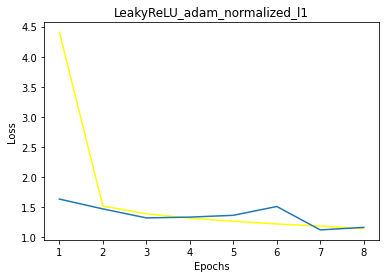

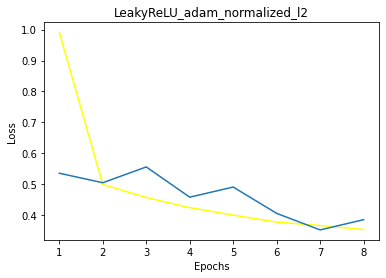

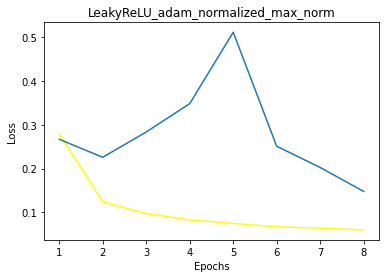

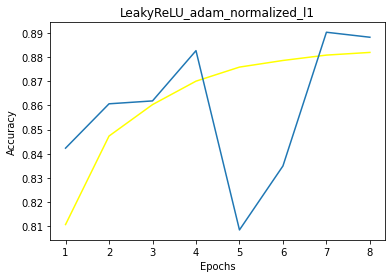

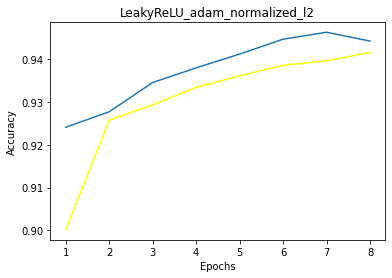

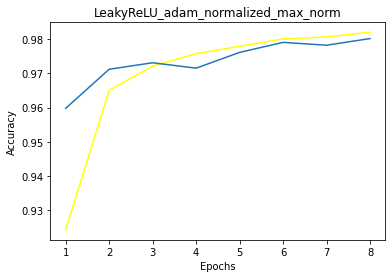

In [146]:

for i in [
    (histoire_LeakyReLU_adam_normalized_l1,
        "LeakyReLU_adam_normalized_l1"),
    (histoire_LeakyReLU_adam_normalized_l2,
     "LeakyReLU_adam_normalized_l2"),
    (histoire_LeakyReLU_adam_normalized_max_norm,
     "LeakyReLU_adam_normalized_max_norm"),

]:
    plt.plot(list(range(1, 9)), i[0].history['loss'], color='yellow')
    plt.plot(list(range(1, 9)), i[0].history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f"{i[1]}")

    plt.show()

for i in [
    (histoire_LeakyReLU_adam_normalized_l1,
        "LeakyReLU_adam_normalized_l1"),
    (histoire_LeakyReLU_adam_normalized_l2,
     "LeakyReLU_adam_normalized_l2"),
    (histoire_LeakyReLU_adam_normalized_max_norm,
     "LeakyReLU_adam_normalized_max_norm"),

]:
    plt.plot(list(range(1, 9)), i[0].history['accuracy'], color='yellow')
    plt.plot(list(range(1, 9)), i[0].history['val_accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f"{i[1]}")

    plt.show()


In [161]:
from sklearn.metrics import f1_score, roc_auc_score
y_test_ = np.argmax(y_test, axis=1)


def f1_score_(model):
    y_pred = model.predict(x_test, verbose=0)
    y_pred_classes = y_pred.argmax(axis=1)
    return f1_score(y_test_, y_pred_classes, average='weighted')

def roc_auc_score_(model):
    y_pred = model.predict(x_test, verbose=0)
    return roc_auc_score(y_test, y_pred, multi_class='ovr')



Може це не прям всі моделі, але думаю достатньо.

In [162]:
models = [model1, model_ELU, model_LeakyReLU, model_LeakyReLU_adam,
          model_LeakyReLU_adam_normalized, model_LeakyReLU_adam_normalized_dif,
          model_LeakyReLU_adam_normalized_dropout, model_LeakyReLU_adam_normalized_init,
          model_LeakyReLU_adam_normalized_l1, model_LeakyReLU_adam_normalized_l2,
          model_LeakyReLU_adam_normalized_max_norm, model_tanh, model_relu_std, model_relu_glorot, model_PReLU]

print("F1-score: ", max(range(len(models)),
      key=lambda x: f1_score_(models[x])))
print("AUC: ", max(range(len(models)),
      key=lambda x: f1_score_(models[x])))


F1-score:  4
AUC:  4


Отже, використовуємо 4-ту модель

In [163]:
model = models[4]

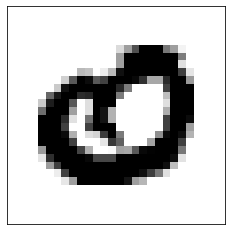

In [181]:
n = 13

sample_data = x_test[n]
sample_image = sample_data.reshape(28, 28)
plt.imshow(sample_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.xticks([])
plt.yticks([])

plt.show()


In [182]:
label = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M',
         13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}
a = model.predict(x_test[n:n+1])
label[a.argmax(axis=1)[0]]

1/1 [==============================] - 0s 121ms/step


'O'

Працює, тепер створю нове зображення.

In [228]:
new = x_test[0:1]

for i in range(len(new[0])):
    new[0][i] = 0

for i in range(20):
    new[0][28*4+13+i*28] = 1
    new[0][28*4+14+i*28] = 1

for i in range(20):
    new[0][28*4+4+i] = 1

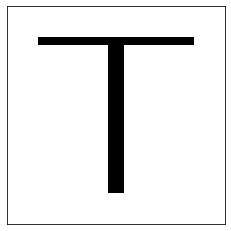

In [229]:
sample_image = new[0].reshape(28, 28)
plt.imshow(sample_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.xticks([])
plt.yticks([])

plt.show()

In [230]:
label = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M',
         13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}
a = model.predict(new)
label[a.argmax(axis=1)[0]]

1/1 [==============================] - 0s 43ms/step


'T'

Ну, зображення подібне але мабуть не дуже, занадто ідельно "намальомане".

Тепер до Cats vs dogs.

Спочатку в окремому перевіримо, щоб всі файли були формату `jpeg`, бо насправді в початковому ні! (треба розкоментувати цю частину, якщо дійсно треба, бо я вже зробив)

In [231]:
import pathlib

def validate_that_photos_are_indeed_photos(data_dir, move_to):
    image_extensions = [".jpg"]
    destination_folder = pathlib.Path(move_to)

    img_type_accepted_by_tf = ["jpeg"]
    for filepath in pathlib.Path(data_dir).rglob("*"):
        if filepath.suffix.lower() in image_extensions:
            img_type = imghdr.what(filepath)
            if img_type is None:
                print(f"{filepath} is not an image")
                filepath.replace(destination_folder / filepath.name)
            elif img_type not in img_type_accepted_by_tf:
                print(
                    f"{filepath} is a {img_type}, not accepted by TensorFlow"
                )
                filepath.replace(destination_folder / filepath.name)


data_dir = r"E:\Homework\ІСППР\PetImages\Dog"
move_to = r"E:\Homework\ІСППР\PetImages\Dog_"
# validate_that_photos_are_indeed_photos(data_dir, move_to)

data_dir = r"E:\Homework\ІСППР\PetImages\Cat"
move_to = r"E:\Homework\ІСППР\PetImages\Cat__"
# validate_that_photos_are_indeed_photos(data_dir, move_to)


In [232]:
path_cat = pathlib.Path(r"E:\Homework\ІСППР\PetImages\Cat")
cat_list = sorted([str(path) for path in
                    path_cat.glob('*.jpg')][:])
path_dog = pathlib.Path(r"E:\Homework\ІСППР\PetImages\Dog")
dog_list = sorted([str(path) for path in
                    path_dog.glob('*.jpg')][:])

In [233]:
len(dog_list), len(cat_list)

(12349, 12385)

In [235]:
import tensorflow as tf

ratio = 0.8
dog_int = int(len(dog_list)*ratio)
cat_int = int(len(cat_list)*ratio)

photos_train = tf.data.Dataset.from_tensor_slices(
    dog_list[:dog_int] + cat_list[:cat_int])
y_train = tf.data.Dataset.from_tensor_slices([np.array([0.0, 1], dtype=np.float32) for _ in dog_list[:dog_int]] +
                                             [np.array([1.0, 0], dtype=np.float32) for _ in cat_list[:cat_int]])


photos_test = tf.data.Dataset.from_tensor_slices(
    dog_list[dog_int:] + cat_list[cat_int:])
y_test = tf.data.Dataset.from_tensor_slices([np.array([0.0, 1], dtype=np.float32) for _ in dog_list[dog_int:]] +
                                            [np.array([1.0, 0], dtype=np.float32) for _ in cat_list[cat_int:]])


In [236]:
img_width, img_height = 50, 50

def load_and_preprocess(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0
    return image

x_train = photos_train.map(load_and_preprocess)

x_test = photos_test.map(load_and_preprocess)

In [237]:
x_train = np.array([i.numpy() for i in x_train])
x_test = np.array([i.numpy() for i in x_test])
y_train = np.array([i.numpy() for i in y_train])
y_test = np.array([i.numpy() for i in y_test])


In [241]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((19787, 50, 50, 3), (4947, 50, 50, 3), (19787, 2), (4947, 2))

Спочатку, я робив цю лабу повністю на цих даних, і в мене краще за 65% не було для моделей з дроп аутом чи без, з різними нормалізаціями і різними функціями активаці і ще я всюди робив 20 епох.

In [239]:
model_tanh_dogs = keras.Sequential()

model_tanh_dogs.add(keras.layers.Flatten(input_shape=(50, 50, 3)))

model_tanh_dogs.add(keras.layers.Dense(
    256, activation="tanh",
    kernel_initializer=keras.initializers.GlorotNormal()
))

model_tanh_dogs.add(keras.layers.Dense(
    128, activation="tanh",
    kernel_initializer=keras.initializers.GlorotNormal()
))

model_tanh_dogs.add(keras.layers.Dense(
    2, activation="softmax",
    kernel_initializer=keras.initializers.GlorotNormal()
))

model_tanh_dogs.compile(loss="categorical_crossentropy", metrics=["accuracy"])
print(model_tanh_dogs.summary())


Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 7500)              0         
                                                                 
 dense_135 (Dense)           (None, 256)               1920256   
                                                                 
 dense_136 (Dense)           (None, 128)               32896     
                                                                 
 dense_137 (Dense)           (None, 2)                 258       
                                                                 
Total params: 1,953,410
Trainable params: 1,953,410
Non-trainable params: 0
_________________________________________________________________
None


In [242]:
histoire_tanh_dogs = model_tanh_dogs.fit(
    x_train, y_train,
    batch_size=200, epochs=10,
    validation_split=0.2,
    validation_data=(x_test, y_test),
    verbose=1)

Epoch 1/10
99/99 [==============================] - 9s 75ms/step - loss: 0.7489 - accuracy: 0.4999 - val_loss: 0.6874 - val_accuracy: 0.5375
Epoch 2/10
99/99 [==============================] - 7s 67ms/step - loss: 0.6926 - accuracy: 0.5259 - val_loss: 0.6835 - val_accuracy: 0.5510
Epoch 3/10
99/99 [==============================] - 6s 59ms/step - loss: 0.6875 - accuracy: 0.5502 - val_loss: 0.6718 - val_accuracy: 0.5818
Epoch 4/10
99/99 [==============================] - 6s 60ms/step - loss: 0.6830 - accuracy: 0.5615 - val_loss: 0.6719 - val_accuracy: 0.5913
Epoch 5/10
99/99 [==============================] - 6s 59ms/step - loss: 0.6762 - accuracy: 0.5824 - val_loss: 0.6789 - val_accuracy: 0.5882
Epoch 6/10
99/99 [==============================] - 6s 63ms/step - loss: 0.6731 - accuracy: 0.5876 - val_loss: 0.6713 - val_accuracy: 0.5787
Epoch 7/10
99/99 [==============================] - 6s 64ms/step - loss: 0.6716 - accuracy: 0.5911 - val_loss: 0.6607 - val_accuracy: 0.5955
Epoch 8/10
99

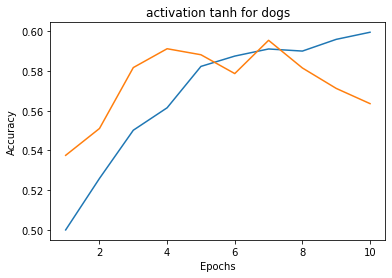

In [244]:
plt.plot(list(range(1, 11)), histoire_tanh_dogs.history['accuracy'])
plt.plot(list(range(1, 11)), histoire_tanh_dogs.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("activation tanh for dogs")

plt.show()

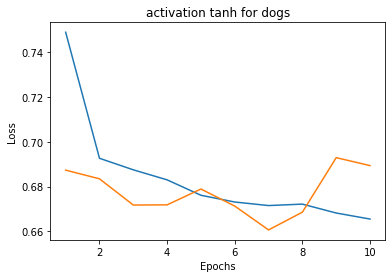

In [245]:
plt.plot(list(range(1, 11)), histoire_tanh_dogs.history['loss'])
plt.plot(list(range(1, 11)), histoire_tanh_dogs.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("activation tanh for dogs")

plt.show()